In [1]:
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import librosa,librosa.display

In [3]:
cd F:\BTP

F:\BTP


We removed silences from the audio files with an application.

"bef_rem" is the original dataset of audiofiles.

"aft_rem" is the dataset of audio files after the silence is removed.


In [4]:
import os
bef_rem=os.listdir('DataSets/wav')
aft_rem=os.listdir('remov/wav')

Let's see if the silence is removed from the audio files

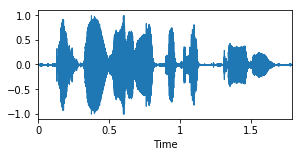

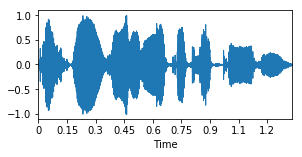

In [5]:
audio_path_bef = 'Datasets/wav/08a02Na.wav'
x , sr = librosa.load(audio_path_bef)
#plt.axis([0, 3, -1, 1])
plt.figure(figsize=(10,2))

plt.subplot(121)
librosa.display.waveplot(x, sr=sr)

audio_path_aft= 'remov/wav/08a02Na.wav'
x , sr = librosa.load(audio_path_aft)
#plt.axis([0, 3, -1, 1])
plt.figure(figsize=(10,2))

plt.subplot(122)
librosa.display.waveplot(x, sr=sr)

We can see form the above plots that the silence is removed within the audiofile.

Let's extract mfcc values from each audio file and its emotion and store them.

_x stores mfccs and _y stores emotions from each audio files in before and after 

In [6]:
mfcc_size = 40
bef_x = np.zeros((len(bef_rem),mfcc_size))
bef_y = np.zeros((len(bef_rem),7),dtype = int)
#bef_x stores the audio files' mfcc
#bef_y stores emotions

code = {
    'W':0, #anger
    'L':1, #boredom
    'E':2, #disgust
    'A':3, #fear
    'F':4, #happy
    'T':5, #sad
    'N':6  #neutral
}
for i in range(len(bef_rem)):
    X, sample_rate = librosa.load('DataSets/wav/'+bef_rem[i], res_type='kaiser_fast')
    bef_y[i][code[bef_rem[i][5]]] = 1  
    bef_x[i] = np.resize(np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=mfcc_size).T,axis=0),(1,mfcc_size))

aft_x = np.zeros((len(aft_rem),mfcc_size))
aft_y = np.zeros((len(aft_rem),7),dtype = int)

#aft_x stores the mfcc after the removal of silences
#aft_y stores emotions

for i in range(len(aft_rem)):
    X, sample_rate = librosa.load('remov/wav/'+aft_rem[i], res_type='kaiser_fast')
    aft_y[i][code[aft_rem[i][5]]] = 1
    aft_x[i] = np.resize(np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=mfcc_size).T,axis=0),(1,mfcc_size))

Now, categorize the datasets of respective emotions

In [7]:
angry_indices = list(np.where(bef_y[:,0]==1)[0])
bef_angry_x = np.zeros((len(angry_indices),mfcc_size))
bef_angry_y = np.zeros((len(angry_indices),7),dtype=int)
aft_angry_x = np.zeros((len(angry_indices),mfcc_size))
aft_angry_y = np.zeros((len(angry_indices),7),dtype=int)
for i in range(len(angry_indices)):
    bef_angry_x[i] = np.resize(bef_x[angry_indices[i]],(1,mfcc_size))
    bef_angry_y[i] = np.resize(bef_y[angry_indices[i]],(1,7))
    aft_angry_x[i] = np.resize(aft_x[angry_indices[i]],(1,mfcc_size))
    aft_angry_y[i] = np.resize(aft_y[angry_indices[i]],(1,7))

boredom_indices = list(np.where(bef_y[:,1]==1)[0])
bef_boredom_x = np.zeros((len(boredom_indices),mfcc_size))
bef_boredom_y = np.zeros((len(boredom_indices),7),dtype=int)
aft_boredom_x = np.zeros((len(boredom_indices),mfcc_size))
aft_boredom_y = np.zeros((len(boredom_indices),7),dtype=int)
for i in range(len(boredom_indices)):
    bef_boredom_x[i] = np.resize(bef_x[boredom_indices[i]],(1,mfcc_size))
    bef_boredom_y[i] = np.resize(bef_y[boredom_indices[i]],(1,7))
    aft_boredom_x[i] = np.resize(aft_x[boredom_indices[i]],(1,mfcc_size))
    aft_boredom_y[i] = np.resize(aft_y[boredom_indices[i]],(1,7))

disgust_indices = list(np.where(bef_y[:,2]==1)[0])
bef_disgust_x = np.zeros((len(disgust_indices),mfcc_size))
bef_disgust_y = np.zeros((len(disgust_indices),7),dtype=int)
aft_disgust_x = np.zeros((len(disgust_indices),mfcc_size))
aft_disgust_y = np.zeros((len(disgust_indices),7),dtype=int)
for i in range(len(disgust_indices)):
    bef_disgust_x[i] = np.resize(bef_x[disgust_indices[i]],(1,mfcc_size))
    bef_disgust_y[i] = np.resize(bef_y[disgust_indices[i]],(1,7))
    aft_disgust_x[i] = np.resize(aft_x[disgust_indices[i]],(1,mfcc_size))
    aft_disgust_y[i] = np.resize(aft_y[disgust_indices[i]],(1,7))

fear_indices = list(np.where(bef_y[:,3]==1)[0])
bef_fear_x = np.zeros((len(fear_indices),mfcc_size))
bef_fear_y = np.zeros((len(fear_indices),7),dtype=int)
aft_fear_x = np.zeros((len(fear_indices),mfcc_size))
aft_fear_y = np.zeros((len(fear_indices),7),dtype=int)
for i in range(len(fear_indices)):
    bef_fear_x[i] = np.resize(bef_x[fear_indices[i]],(1,mfcc_size))
    bef_fear_y[i] = np.resize(bef_y[fear_indices[i]],(1,7))
    aft_fear_x[i] = np.resize(aft_x[fear_indices[i]],(1,mfcc_size))
    aft_fear_y[i] = np.resize(aft_y[fear_indices[i]],(1,7))

happy_indices = list(np.where(bef_y[:,4]==1)[0])
bef_happy_x = np.zeros((len(happy_indices),mfcc_size))
bef_happy_y = np.zeros((len(happy_indices),7),dtype=int)
aft_happy_x = np.zeros((len(happy_indices),mfcc_size))
aft_happy_y = np.zeros((len(happy_indices),7),dtype=int)
for i in range(len(happy_indices)):
    bef_happy_x[i] = np.resize(bef_x[happy_indices[i]],(1,mfcc_size))
    bef_happy_y[i] = np.resize(bef_y[happy_indices[i]],(1,7))
    aft_happy_x[i] = np.resize(aft_x[happy_indices[i]],(1,mfcc_size))
    aft_happy_y[i] = np.resize(aft_y[happy_indices[i]],(1,7))

sad_indices = list(np.where(bef_y[:,5]==1)[0])
bef_sad_x = np.zeros((len(sad_indices),mfcc_size))
bef_sad_y = np.zeros((len(sad_indices),7),dtype=int)
aft_sad_x = np.zeros((len(sad_indices),mfcc_size))
aft_sad_y = np.zeros((len(sad_indices),7),dtype=int)
for i in range(len(sad_indices)):
    bef_sad_x[i] = np.resize(bef_x[sad_indices[i]],(1,mfcc_size))
    bef_sad_y[i] = np.resize(bef_y[sad_indices[i]],(1,7))
    aft_sad_x[i] = np.resize(aft_x[sad_indices[i]],(1,mfcc_size))
    aft_sad_y[i] = np.resize(aft_y[sad_indices[i]],(1,7))

neutral_indices = list(np.where(bef_y[:,6]==1)[0])
bef_neutral_x = np.zeros((len(neutral_indices),mfcc_size))
bef_neutral_y = np.zeros((len(neutral_indices),7),dtype=int)
aft_neutral_x = np.zeros((len(neutral_indices),mfcc_size))
aft_neutral_y = np.zeros((len(neutral_indices),7),dtype=int)
for i in range(len(neutral_indices)):
    bef_neutral_x[i] = np.resize(bef_x[neutral_indices[i]],(1,mfcc_size))
    bef_neutral_y[i] = np.resize(bef_y[neutral_indices[i]],(1,7))
    aft_neutral_x[i] = np.resize(aft_x[neutral_indices[i]],(1,mfcc_size))
    aft_neutral_y[i] = np.resize(aft_y[neutral_indices[i]],(1,7))


Lets divide the dataset into test/train/split as 60/20/20 and create a 3 layered dnn model with 128-256-128 nodes.
model_a is for the dataset after the removal of silence.
model_b is for the dataset before the removal of silemce(original audio).

In [8]:
from sklearn.model_selection import train_test_split
Xa_train, Xa_test, ya_train, ya_test = train_test_split(aft_x, aft_y, test_size=0.2, random_state=42)
Xa_train, Xa_valid, ya_train, ya_valid = train_test_split(Xa_train, ya_train, test_size=0.25, random_state=42)

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

tf.random.set_seed(7)

num_labels = 7
filter_size = 2

model_a = Sequential()

model_a.add(Dense(128, input_shape=(mfcc_size,)))
model_a.add(Activation('relu'))
model_a.add(Dropout(0.5))

model_a.add(Dense(256))
model_a.add(Activation('relu'))
model_a.add(Dropout(0.5))

model_a.add(Dense(128))
model_a.add(Activation('relu'))
model_a.add(Dropout(0.5))

model_a.add(Dense(num_labels))
model_a.add(Activation('softmax'))

model_a.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


model_a.fit(Xa_train, ya_train, batch_size=30, epochs=200, validation_data=(Xa_valid,ya_valid))



Epoch 1/200
11/11 [==============================] - 0s 27ms/step - loss: 36.4235 - accuracy: 0.1944 - val_loss: 9.1989 - val_accuracy: 0.3084
Epoch 2/200
11/11 [==============================] - 0s 6ms/step - loss: 26.3968 - accuracy: 0.1411 - val_loss: 4.4018 - val_accuracy: 0.2710
Epoch 3/200
11/11 [==============================] - 0s 5ms/step - loss: 16.6849 - accuracy: 0.1912 - val_loss: 2.0971 - val_accuracy: 0.2710
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 12.1950 - accuracy: 0.1787 - val_loss: 1.8211 - val_accuracy: 0.2617
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 8.7498 - accuracy: 0.2288 - val_loss: 1.7804 - val_accuracy: 0.2804
Epoch 6/200
11/11 [==============================] - 0s 5ms/step - loss: 7.3562 - accuracy: 0.1912 - val_loss: 1.8726 - val_accuracy: 0.2430
Epoch 7/200
11/11 [==============================] - 0s 4ms/step - loss: 5.9635 - accuracy: 0.2382 - val_loss: 1.8665 - val_accuracy: 0.2056
Epoch 8/

Checking the accuracy of the model_a

In [9]:
from sklearn.metrics import accuracy_score

predict_ya= model_a.predict(Xa_test )
np.where(np.argmax(predict_ya[:]),1,0)
for i in range(len(predict_ya)):
    temp = np.argmax(predict_ya[i])
    predict_ya[i] = np.zeros((1,7))
    predict_ya[i][temp] = 1
aft_acc=accuracy_score(ya_test,predict_ya)
print(aft_acc)

0.6355140186915887


Same with model_b with Dataset before silence removal

In [10]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(bef_x, bef_y, test_size=0.2, random_state=42)
Xb_train, Xb_valid, yb_train, yb_valid = train_test_split(Xb_train, yb_train, test_size=0.25, random_state=42)

tf.random.set_seed(7)


num_labels = 7
filter_size = 2

model_b = Sequential()

model_b.add(Dense(128, input_shape=(mfcc_size,)))
model_b.add(Activation('relu'))
model_b.add(Dropout(0.5))

model_b.add(Dense(256))
model_b.add(Activation('relu'))
model_b.add(Dropout(0.5))

model_b.add(Dense(128))
model_b.add(Activation('relu'))
model_b.add(Dropout(0.5))

model_b.add(Dense(num_labels))
model_b.add(Activation('softmax'))

model_b.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

model_b.fit(Xb_train, yb_train, batch_size=30, epochs=200, validation_data=(Xb_valid,yb_valid))



Epoch 1/200
11/11 [==============================] - 0s 14ms/step - loss: 40.0898 - accuracy: 0.1724 - val_loss: 9.6399 - val_accuracy: 0.2336
Epoch 2/200
11/11 [==============================] - 0s 5ms/step - loss: 29.5270 - accuracy: 0.1285 - val_loss: 5.2471 - val_accuracy: 0.2991
Epoch 3/200
11/11 [==============================] - 0s 5ms/step - loss: 19.8766 - accuracy: 0.1724 - val_loss: 2.3935 - val_accuracy: 0.2804
Epoch 4/200
11/11 [==============================] - 0s 5ms/step - loss: 15.1068 - accuracy: 0.1755 - val_loss: 1.9525 - val_accuracy: 0.2243
Epoch 5/200
11/11 [==============================] - 0s 5ms/step - loss: 11.0341 - accuracy: 0.1850 - val_loss: 1.8064 - val_accuracy: 0.2897
Epoch 6/200
11/11 [==============================] - 0s 6ms/step - loss: 8.8770 - accuracy: 0.1129 - val_loss: 1.8893 - val_accuracy: 0.1869
Epoch 7/200
11/11 [==============================] - 0s 5ms/step - loss: 7.5985 - accuracy: 0.1787 - val_loss: 1.8561 - val_accuracy: 0.1963
Epoch 8

In [11]:
predict_yb= model_b.predict(Xb_test )
np.where(np.argmax(predict_yb[:]),1,0)
for i in range(len(predict_yb)):
    temp = np.argmax(predict_yb[i])
    predict_yb[i] = np.zeros((1,7))
    predict_yb[i][temp] = 1
bef_acc=accuracy_score(yb_test,predict_yb)
print(bef_acc)

0.5700934579439252


So, here comes the main part . Calculating the accuracies of predicting different emotions before and after silence removal

In [38]:
accuracies = [[0 for i in range(2)] for j in range(7)] 
predict_angry_b= model_b.predict(bef_angry_x)
np.where(np.argmax(predict_angry_b[:]),1,0)
for i in range(len(predict_angry_b)):
    temp = np.argmax(predict_angry_b[i])
    predict_angry_b[i] = np.zeros((1,7))
    predict_angry_b[i][temp] = 1
accuracies[0][0]=round((accuracy_score(bef_angry_y,predict_angry_b)),2)

predict_angry_a= model_a.predict(aft_angry_x)
np.where(np.argmax(predict_angry_a[:]),1,0)
for i in range(len(predict_angry_a)):
    temp = np.argmax(predict_angry_a[i])
    predict_angry_a[i] = np.zeros((1,7))
    predict_angry_a[i][temp] = 1
accuracies[0][1]=round(accuracy_score(aft_angry_y,predict_angry_a),2)

predict_boredom_b= model_b.predict(bef_boredom_x)
np.where(np.argmax(predict_boredom_b[:]),1,0)
for i in range(len(predict_boredom_b)):
    temp = np.argmax(predict_boredom_b[i])
    predict_boredom_b[i] = np.zeros((1,7))
    predict_boredom_b[i][temp] = 1
accuracies[1][0]=round(accuracy_score(bef_boredom_y,predict_boredom_b),2)

predict_boredom_a= model_a.predict(aft_boredom_x)
np.where(np.argmax(predict_boredom_a[:]),1,0)
for i in range(len(predict_boredom_a)):
    temp = np.argmax(predict_boredom_a[i])
    predict_boredom_a[i] = np.zeros((1,7))
    predict_boredom_a[i][temp] = 1
accuracies[1][1]=round(accuracy_score(aft_boredom_y,predict_boredom_a),2)

predict_disgust_b= model_b.predict(bef_disgust_x)
np.where(np.argmax(predict_disgust_b[:]),1,0)
for i in range(len(predict_disgust_b)):
    temp = np.argmax(predict_disgust_b[i])
    predict_disgust_b[i] = np.zeros((1,7))
    predict_disgust_b[i][temp] = 1
accuracies[2][0]=round(accuracy_score(bef_disgust_y,predict_disgust_b),2)

predict_disgust_a= model_a.predict(aft_disgust_x)
np.where(np.argmax(predict_disgust_a[:]),1,0)
for i in range(len(predict_disgust_a)):
    temp = np.argmax(predict_disgust_a[i])
    predict_disgust_a[i] = np.zeros((1,7))
    predict_disgust_a[i][temp] = 1
accuracies[2][1]=round(accuracy_score(aft_disgust_y,predict_disgust_a),2)

predict_fear_b= model_b.predict(bef_fear_x)
np.where(np.argmax(predict_fear_b[:]),1,0)
for i in range(len(predict_fear_b)):
    temp = np.argmax(predict_fear_b[i])
    predict_fear_b[i] = np.zeros((1,7))
    predict_fear_b[i][temp] = 1
accuracies[3][0]=round(accuracy_score(bef_fear_y,predict_fear_b),2)

predict_fear_a= model_a.predict(aft_fear_x)
np.where(np.argmax(predict_fear_a[:]),1,0)
for i in range(len(predict_fear_a)):
    temp = np.argmax(predict_fear_a[i])
    predict_fear_a[i] = np.zeros((1,7))
    predict_fear_a[i][temp] = 1
accuracies[3][1]=round(accuracy_score(aft_fear_y,predict_fear_a),2)

predict_happy_b= model_b.predict(bef_happy_x)
np.where(np.argmax(predict_happy_b[:]),1,0)
for i in range(len(predict_happy_b)):
    temp = np.argmax(predict_happy_b[i])
    predict_happy_b[i] = np.zeros((1,7))
    predict_happy_b[i][temp] = 1
accuracies[4][0]=round(accuracy_score(bef_happy_y,predict_happy_b),2)

predict_happy_a= model_a.predict(aft_happy_x)
np.where(np.argmax(predict_happy_a[:]),1,0)
for i in range(len(predict_happy_a)):
    temp = np.argmax(predict_happy_a[i])
    predict_happy_a[i] = np.zeros((1,7))
    predict_happy_a[i][temp] = 1
accuracies[4][1]=round(accuracy_score(aft_happy_y,predict_happy_a),2)

predict_sad_b= model_b.predict(bef_sad_x)
np.where(np.argmax(predict_sad_b[:]),1,0)
for i in range(len(predict_sad_b)):
    temp = np.argmax(predict_sad_b[i])
    predict_sad_b[i] = np.zeros((1,7))
    predict_sad_b[i][temp] = 1
accuracies[5][0]=round(accuracy_score(bef_sad_y,predict_sad_b),2)

predict_sad_a= model_a.predict(aft_sad_x)
np.where(np.argmax(predict_sad_a[:]),1,0)
for i in range(len(predict_sad_a)):
    temp = np.argmax(predict_sad_a[i])
    predict_sad_a[i] = np.zeros((1,7))
    predict_sad_a[i][temp] = 1
accuracies[5][1]=round(accuracy_score(aft_sad_y,predict_sad_a),2)

predict_neutral_b= model_b.predict(bef_neutral_x)
np.where(np.argmax(predict_neutral_b[:]),1,0)
for i in range(len(predict_neutral_b)):
    temp = np.argmax(predict_neutral_b[i])
    predict_neutral_b[i] = np.zeros((1,7))
    predict_neutral_b[i][temp] = 1
accuracies[6][0]=round(accuracy_score(bef_neutral_y,predict_neutral_b),2)

predict_neutral_a= model_a.predict(aft_neutral_x)
np.where(np.argmax(predict_neutral_a[:]),1,0)
for i in range(len(predict_neutral_a)):
    temp = np.argmax(predict_neutral_a[i])
    predict_neutral_a[i] = np.zeros((1,7))
    predict_neutral_a[i][temp] = 1
accuracies[6][1]=round(accuracy_score(aft_neutral_y,predict_neutral_a),2)


In [39]:
print('angry', (accuracies[0]))
print('\nboredom', accuracies[1])
print('\ndisgust', accuracies[2])
print('\nfear', accuracies[3])
print('\nhappy', accuracies[4])
print('\nsad', accuracies[5])
print('\nneutral', accuracies[6])


angry [0.92, 0.84]

boredom [0.75, 0.64]

disgust [0.67, 0.63]

fear [0.75, 0.74]

happy [0.63, 0.65]

sad [0.97, 0.93]

neutral [0.42, 0.81]


The first number shows the prediction accuracy of the original file and the one after shows after silence removal.

So, the results shows that there is almost no effect on emotions like fear,happy and disgust. 

But on the other hand, the accuracy on predicting the emotions like angry,boredom and sad is less than that of those when removed the silence. 
Also, interesting result is that the audio files having _neutral emotion are a lot easier to predict_ when removed silence from them.

However , we cannot conclude on this dnn model solely. We have to compare them cnn and svm as well to conclude our results.